# Linear Regression and Pairs Trading

@ Jul 2017

## MIT License

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm

In [2]:
tickers = ['PEP', 'KO']
data = get_pricing(symbols(tickers), start_date='2006-01-01', end_date='2008-08-01',
                  fields='close_price', frequency='daily')
data.head()

,Equity(5885 [PEP]),Equity(4283 [KO])
2006-01-03 00:00:00+00:00,56.785,38.273
2006-01-04 00:00:00+00:00,56.747,38.208
2006-01-05 00:00:00+00:00,56.424,38.404
2006-01-06 00:00:00+00:00,56.633,38.732
2006-01-09 00:00:00+00:00,56.367,38.938


In [3]:
data.columns

Index([Equity(5885 [PEP]), Equity(4283 [KO])], dtype='object')

In [4]:
data.columns = [ticker.symbol for ticker in data.columns]
data.index.name = 'Date'
data.head()

,PEP,KO
Date,,
2006-01-03 00:00:00+00:00,56.785,38.273
2006-01-04 00:00:00+00:00,56.747,38.208
2006-01-05 00:00:00+00:00,56.424,38.404
2006-01-06 00:00:00+00:00,56.633,38.732
2006-01-09 00:00:00+00:00,56.367,38.938


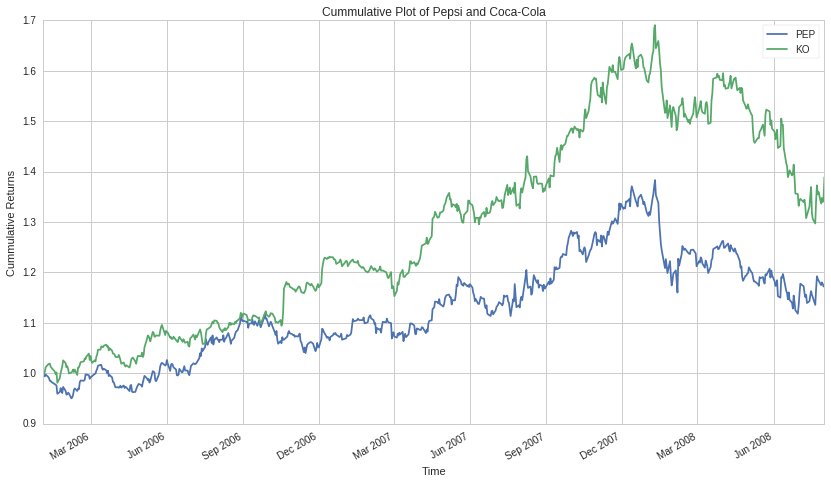

In [5]:
cumm_rtn = (1 + data.pct_change()).cumprod()
cumm_rtn.plot();
plt.ylabel('Cummulative Returns');
plt.xlabel('Time');
plt.title('Cummulative Plot of Pepsi and Coca-Cola');

# Visualise Price Relationship Between the Two Securities

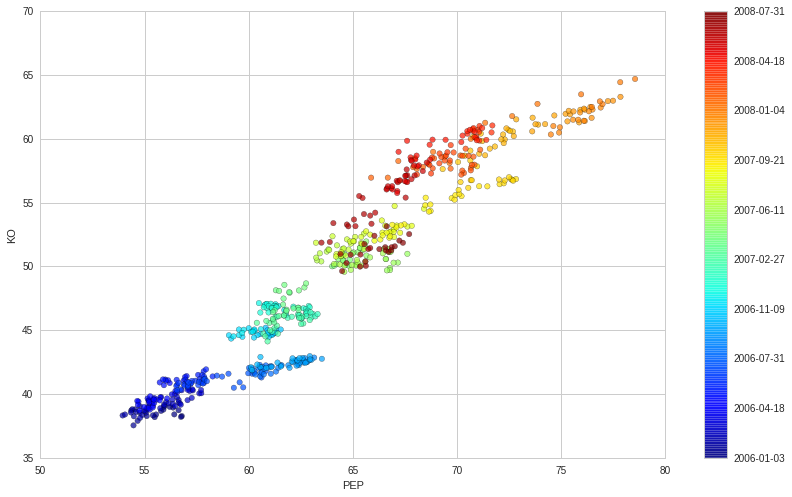

In [6]:
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data[tickers[0]], data[tickers[1]], s=30,
                 c=colors, cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in data[::len(data)//9].index])
plt.xlabel(tickers[0])
plt.ylabel(tickers[1]);

***

**Linear Regression in vector form**

$$y = \beta x + \varepsilon$$

where,

\begin{equation*}
y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
\end{equation*}

\begin{equation*}
x = \begin{pmatrix} x_1^T \\ x_2^T \\ \vdots \\ x_n^T
\end{pmatrix}
\end{equation*}

\begin{equation*}
\beta  = \begin{pmatrix} \beta_0  \\ \beta_1  \\ \vdots \\ \beta_p 
\end{pmatrix}
\end{equation*}

\begin{equation*}
\varepsilon   = \begin{pmatrix} \varepsilon_1  \\ \varepsilon_2  \\ \vdots \\ \varepsilon_n 
\end{pmatrix}
\end{equation*}


**Spread**


$$
\begin{align*}
\varepsilon & = y - \begin{bmatrix} \beta_0 & \beta_1 \end{bmatrix} \begin{bmatrix} 1 \\ x \end{bmatrix}  \\ \\
& = p^{KO} - \begin{bmatrix} \beta_0 & \beta_1 \end{bmatrix} \begin{bmatrix} 1 \\ p^{PEP} \end{bmatrix} \\ \\
& = p^{KO} - \beta_0 - \beta_1 p^{PEP}
\end{align*}
$$


where,

$p = Price$

# Estimate with stats model

using statsmodel to estimate the parameters

KO is our dependent variable, and PEP is our independent variable

In [7]:
X = sm.add_constant(data[tickers[0]], prepend=False)
ols = sm.OLS(data[tickers[1]], X).fit()
beta = ols.params
y_fit = [X.min().dot(beta), X.max().dot(beta)]

In [8]:
print(ols.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.919    
Dependent Variable: KO               AIC:                2837.4049
Date:               2017-07-14 09:02 BIC:                2846.3588
No. Observations:   650              Log-Likelihood:     -1416.7  
Df Model:           1                F-statistic:        7355.    
Df Residuals:       648              Prob (F-statistic): 0.00     
R-squared:          0.919            Scale:              4.5919   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
PEP          1.2688    0.0148   85.7605  0.0000    1.2397    1.2978
const      -31.9220    0.9511  -33.5622  0.0000  -33.7896  -30.0543
------------------------------------------------------------------
Omnibus:              8.992         Durbin-Watson:           0.082
Prob(Om

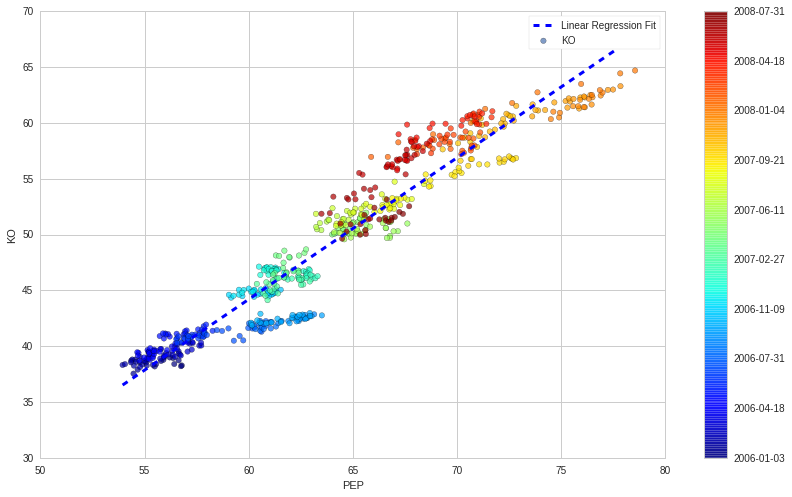

In [9]:
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data[tickers[0]], data[tickers[1]], s=30,
                 c=colors, cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7)
plt.plot([X.min()[0], X.max()[0]], y_fit, '--b', linewidth=3, label='Linear Regression Fit')
plt.legend()

cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in data[::len(data)//9].index])
plt.xlabel(tickers[0])
plt.ylabel(tickers[1]);

It is a perfect fit becasue this is in-sample

***

# Linear Regression with scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression(fit_intercept=True)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
reg.fit(data[tickers[0]].reshape(-1,1), data[tickers[1]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(reg.coef_)
print(reg.intercept_)

[ 1.26875149]
-31.9219750797


# Modelling the Spread

$$\varepsilon = y - \beta_1 x - \beta_0$$

In [14]:
spread = pd.DataFrame(data[tickers[1]] - beta[0] * data[tickers[0]] - beta[1])

In [15]:
spread.columns = ['in-sample']
spread.head()

,in-sample
Date,
2006-01-03 00:00:00+00:00,-1.851078
2006-01-04 00:00:00+00:00,-1.867866
2006-01-05 00:00:00+00:00,-1.262059
2006-01-06 00:00:00+00:00,-1.199228
2006-01-09 00:00:00+00:00,-0.655740


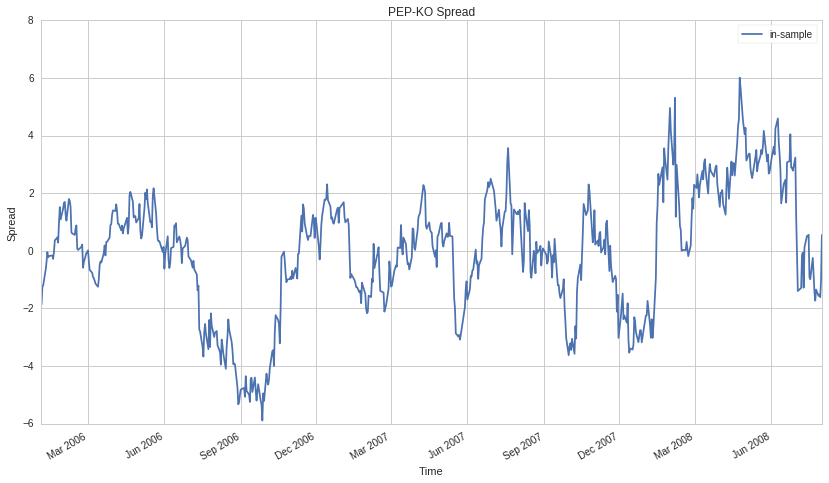

In [16]:
spread.plot();
plt.xlabel('Time');
plt.ylabel('Spread');
plt.title('PEP-KO Spread');

# Testing for Cointegration

In [17]:
adf = statsmodels.tsa.stattools.adfuller(spread['in-sample'], maxlag=1)
print('ADF test statistics: {:.03f}').format(adf[0])
print('p-value: {:.03f}').format(adf[1])

ADF test statistics: -3.411
p-value: 0.011


# Trading Logic

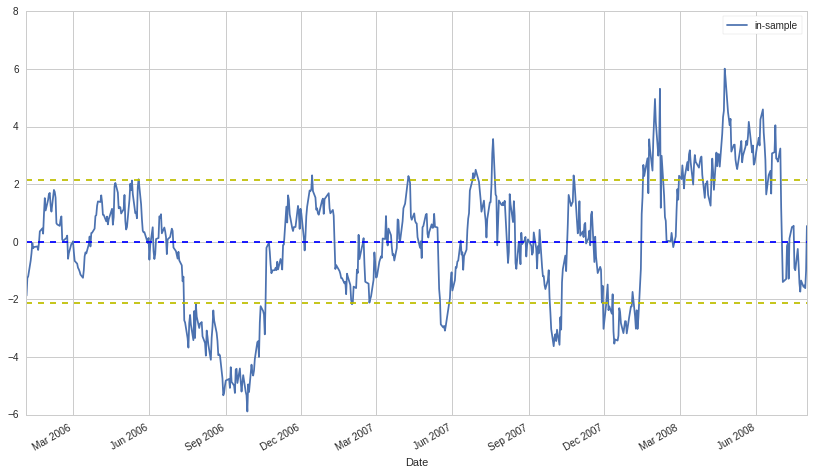

In [18]:
spread.plot();
plt.axhline(spread['in-sample'].mean(), ls='--', color='b');
plt.axhline(spread['in-sample'].mean() + spread['in-sample'].std(), ls='--', color='y');
plt.axhline(spread['in-sample'].mean() - spread['in-sample'].std(), ls='--', color='y');

# Out of Sample / Test Set

In [19]:
data_oos = get_pricing(symbols(tickers), start_date='2008-08-01', end_date='2010-01-01',
                      fields='close_price', frequency='daily')
data_oos.columns = [ticker.symbol for ticker in data_oos.columns]
data_oos.index.name = 'Date'

In [20]:
spread_oos = spread.reindex((spread.index).union(data_oos.index))

In [21]:
spread_oos['out-of-sample'] = data_oos[tickers[1]] - beta[0] * data_oos[tickers[0]] - beta[1]

In [22]:
spread_oos.head()

,in-sample,out-of-sample
Date,,
2006-01-03 00:00:00+00:00,-1.851078,NaN
2006-01-04 00:00:00+00:00,-1.867866,NaN
2006-01-05 00:00:00+00:00,-1.262059,NaN
2006-01-06 00:00:00+00:00,-1.199228,NaN
2006-01-09 00:00:00+00:00,-0.655740,NaN


In [23]:
spread_oos.tail()

,in-sample,out-of-sample
Date,,
2009-12-24 00:00:00+00:00,NaN,12.105009
2009-12-28 00:00:00+00:00,NaN,11.762446
2009-12-29 00:00:00+00:00,NaN,12.151259
2009-12-30 00:00:00+00:00,NaN,11.838259
2009-12-31 00:00:00+00:00,NaN,11.789947


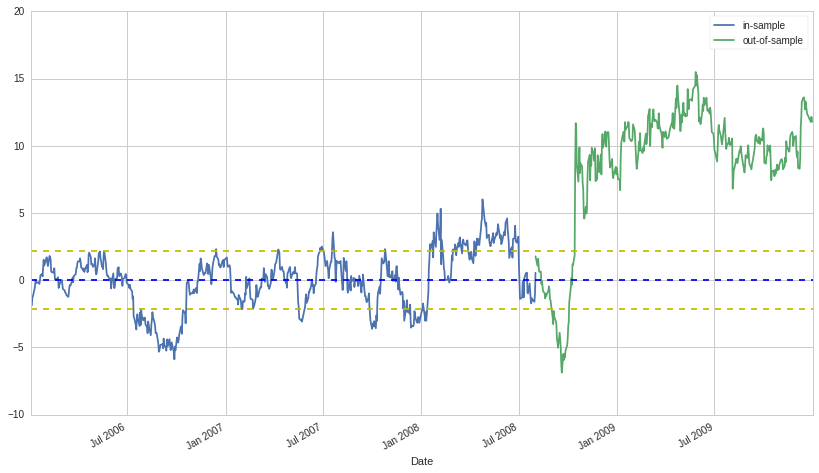

In [24]:
spread_oos.plot();
plt.axhline(spread['in-sample'].mean(), ls='--', color='b');
plt.axhline(spread['in-sample'].mean() + spread['in-sample'].std(), ls='--', color='y');
plt.axhline(spread['in-sample'].mean() - spread['in-sample'].std(), ls='--', color='y');

# What happened?

Lehman Brothers

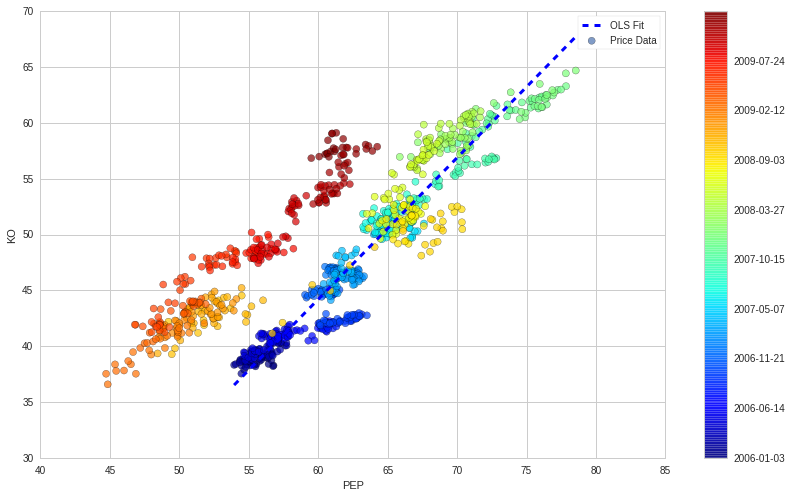

In [25]:
data_all = data.append(data_oos)
colors = np.linspace(0.1, 1, len(data_all))
sc = plt.scatter(data_all[tickers[0]], data_all[tickers[1]], s=50, c=colors, 
                 cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7, label='Price Data')
plt.plot([X.min()[0], X.max()[0]], y_fit, '--b', linewidth=3, label='OLS Fit')
plt.legend()
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in data_all[::len(data_all)//9].index])
plt.xlabel(tickers[0])
plt.ylabel(tickers[1]);

***

# Tear Sheet

In [26]:
bt = get_backtest('59687abcabb3315736a24c90')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2006-01-03
Entire data end date: 2008-08-01


Backtest Months: 30


Performance statistics,Backtest
annual_return,-0.02
cum_returns_final,-0.04
annual_volatility,0.07
sharpe_ratio,-0.22
calmar_ratio,-0.10
stability_of_timeseries,0.50
max_drawdown,-0.17
omega_ratio,0.96
sortino_ratio,-0.30
skew,-0.36


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,17.41,2006-10-18,2007-10-30,NaT,NaN
1,3.18,2006-04-12,2006-09-07,2006-10-18,136
2,1.00,2006-03-13,2006-03-22,2006-03-30,14
3,0.78,2006-02-02,2006-02-06,2006-02-09,6
4,0.55,2006-02-23,2006-03-01,2006-03-03,7




[-0.009 -0.019]


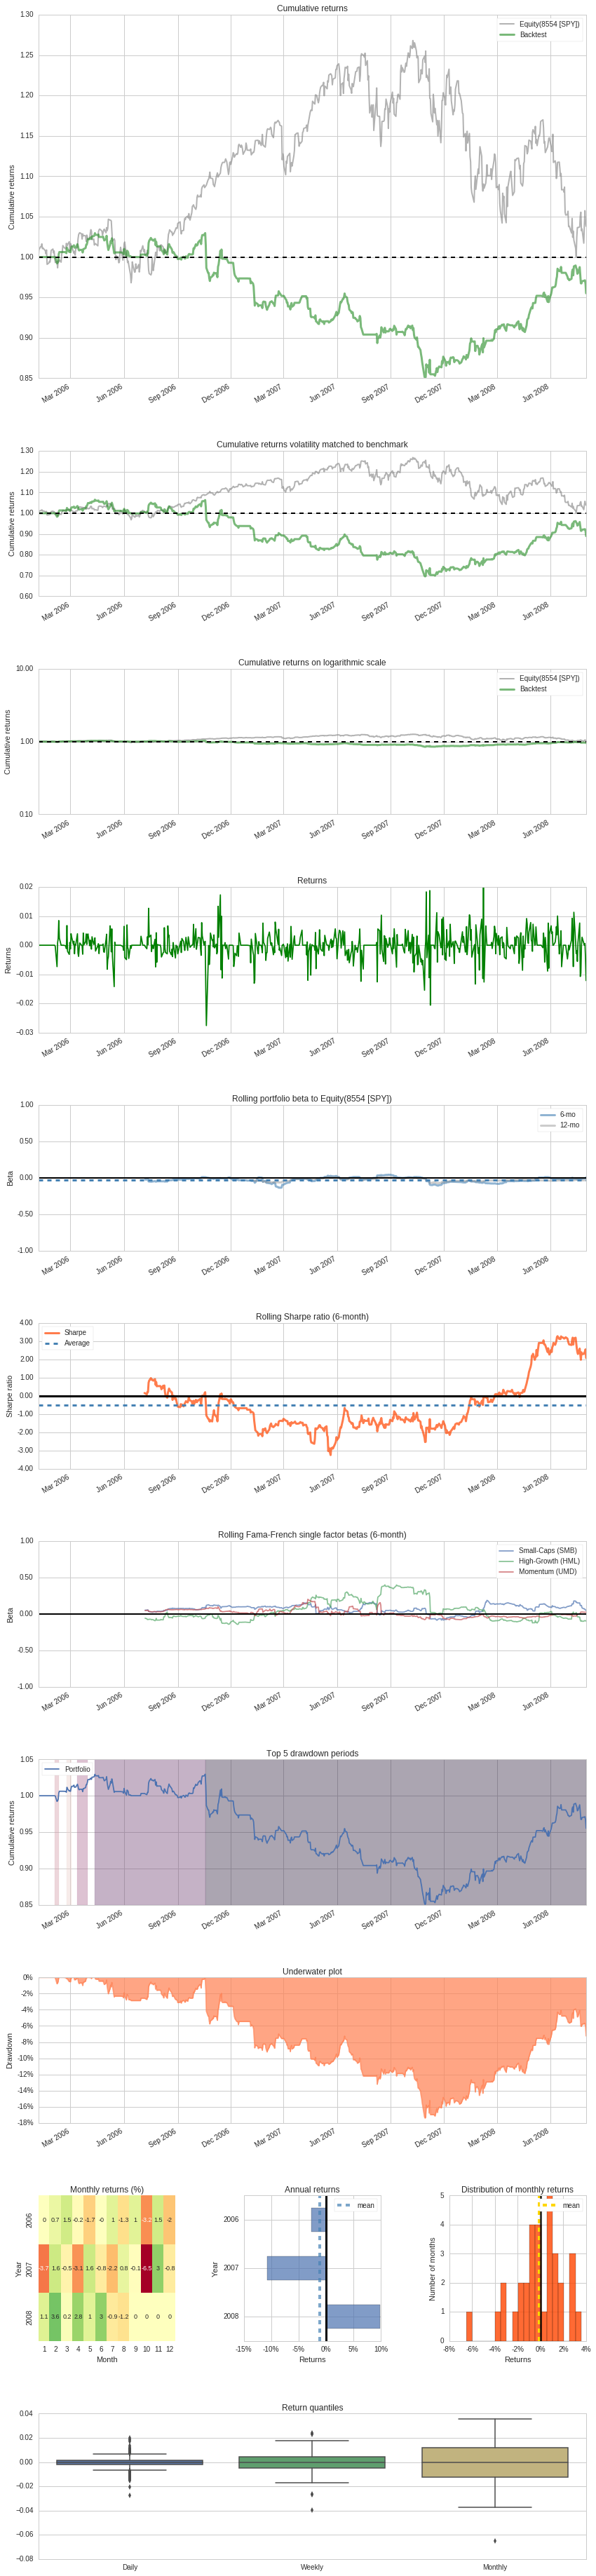

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Stress Events,mean,min,max
Lehmann,-1.22%,-1.22%,-1.22%
Aug07,0.04%,-1.26%,1.03%
Mar08,0.03%,-0.47%,0.61%
Low Volatility Bull Market,-0.02%,-2.76%,1.73%
GFC Crash,0.02%,-2.06%,1.99%


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=733255.0, right=733255.0
  'left=%s, right=%s') % (left, right))


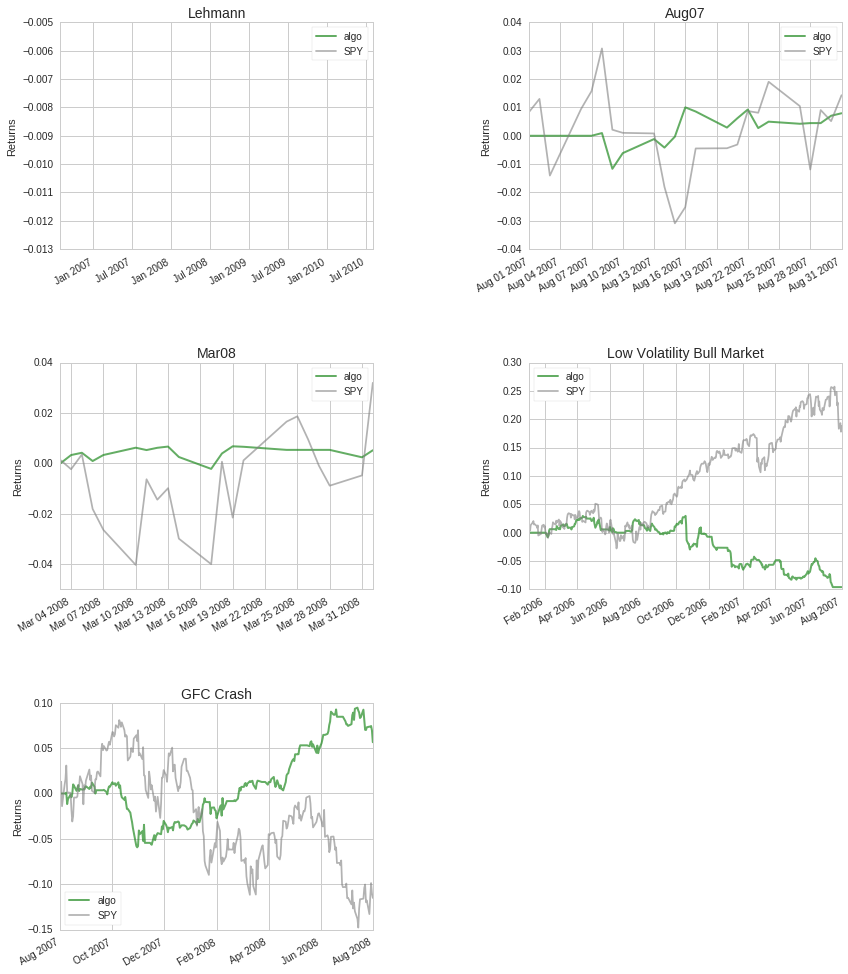

Top 10 long positions of all time,max
PEP-5885,70.14%
KO-4283,46.95%


Top 10 short positions of all time,max
PEP-5885,-104.29%
KO-4283,-70.88%


Top 10 positions of all time,max
PEP-5885,104.29%
KO-4283,70.88%


All positions ever held,max
PEP-5885,104.29%
KO-4283,70.88%


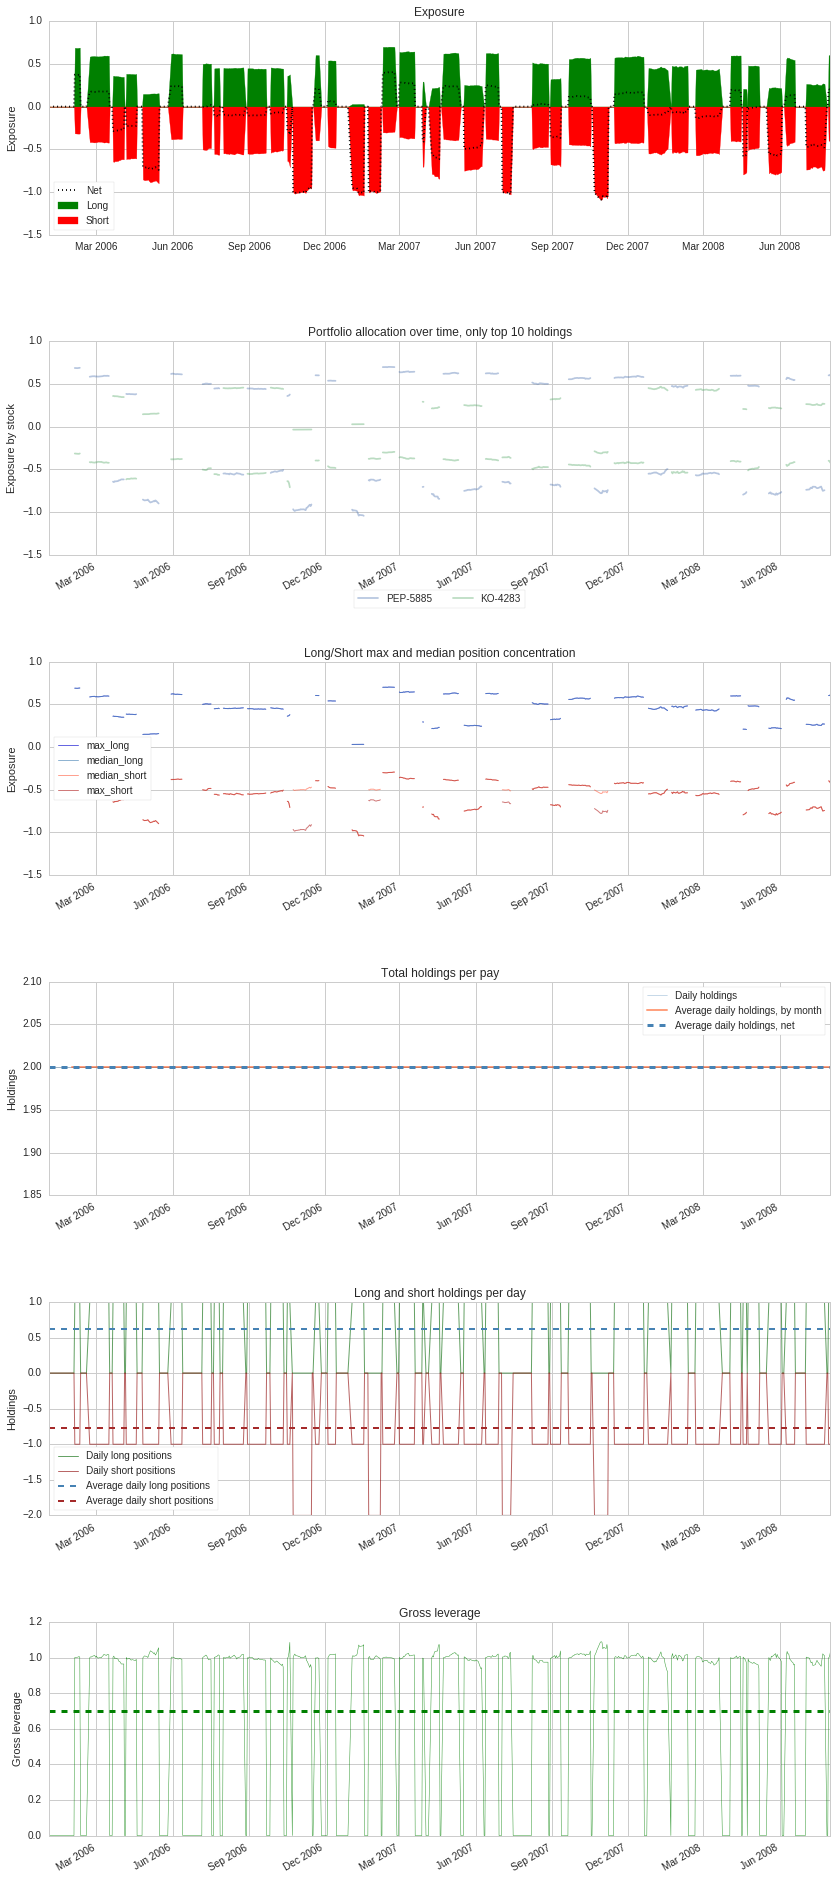

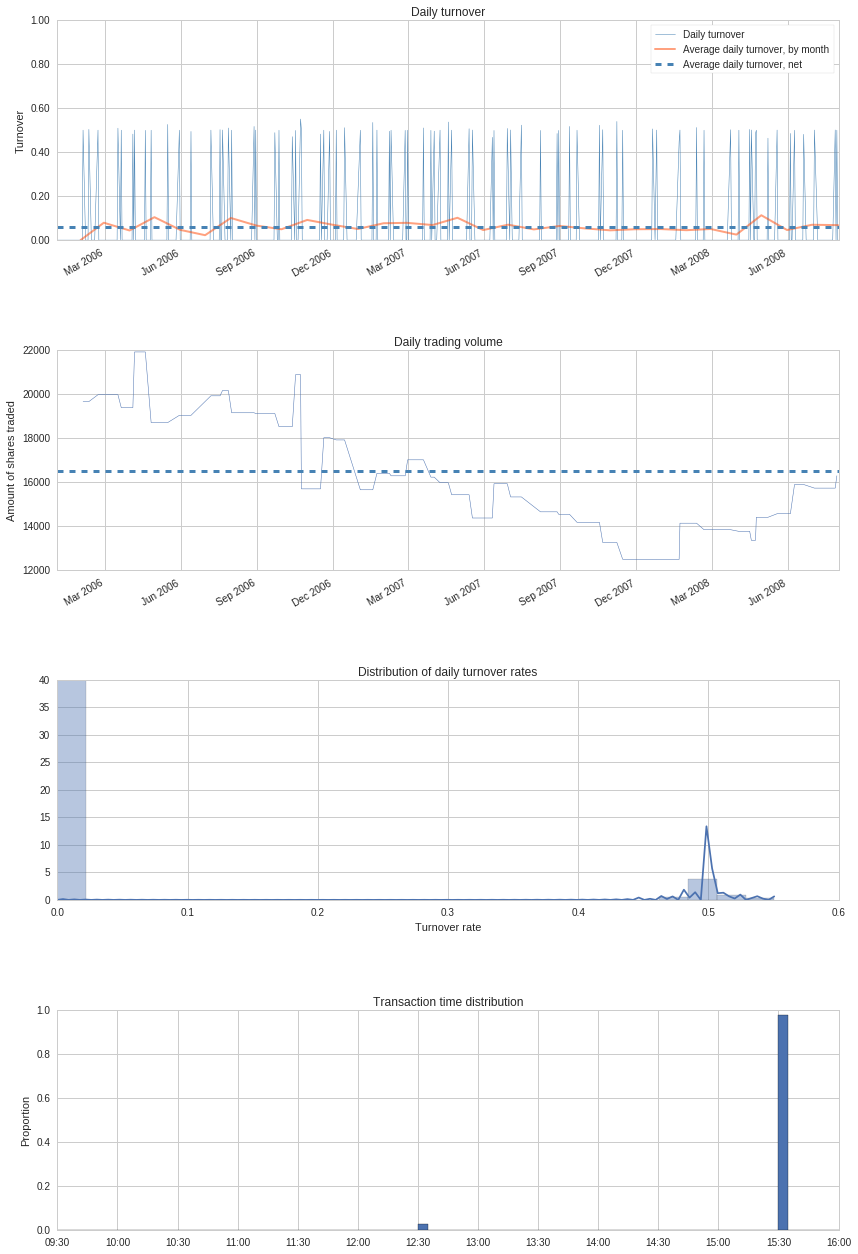

In [27]:
bt.create_full_tear_sheet()

In [28]:
bt = get_backtest('59687c3e6d859b532e83fc13')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2008-08-01
Entire data end date: 2009-12-31


Backtest Months: 17


Performance statistics,Backtest
annual_return,-0.08
cum_returns_final,-0.11
annual_volatility,0.11
sharpe_ratio,-0.72
calmar_ratio,-0.52
stability_of_timeseries,0.25
max_drawdown,-0.15
omega_ratio,0.87
sortino_ratio,-0.92
skew,-0.70


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,15.34,2008-09-04,2008-10-16,NaT,NaN
1,0.00,2008-08-01,2008-08-01,2008-08-01,1
2,0.00,2008-08-01,2008-08-01,2008-08-01,1
3,0.00,2008-08-01,2008-08-01,2008-08-01,1
4,0.00,2008-08-01,2008-08-01,2008-08-01,1




[-0.014 -0.03 ]


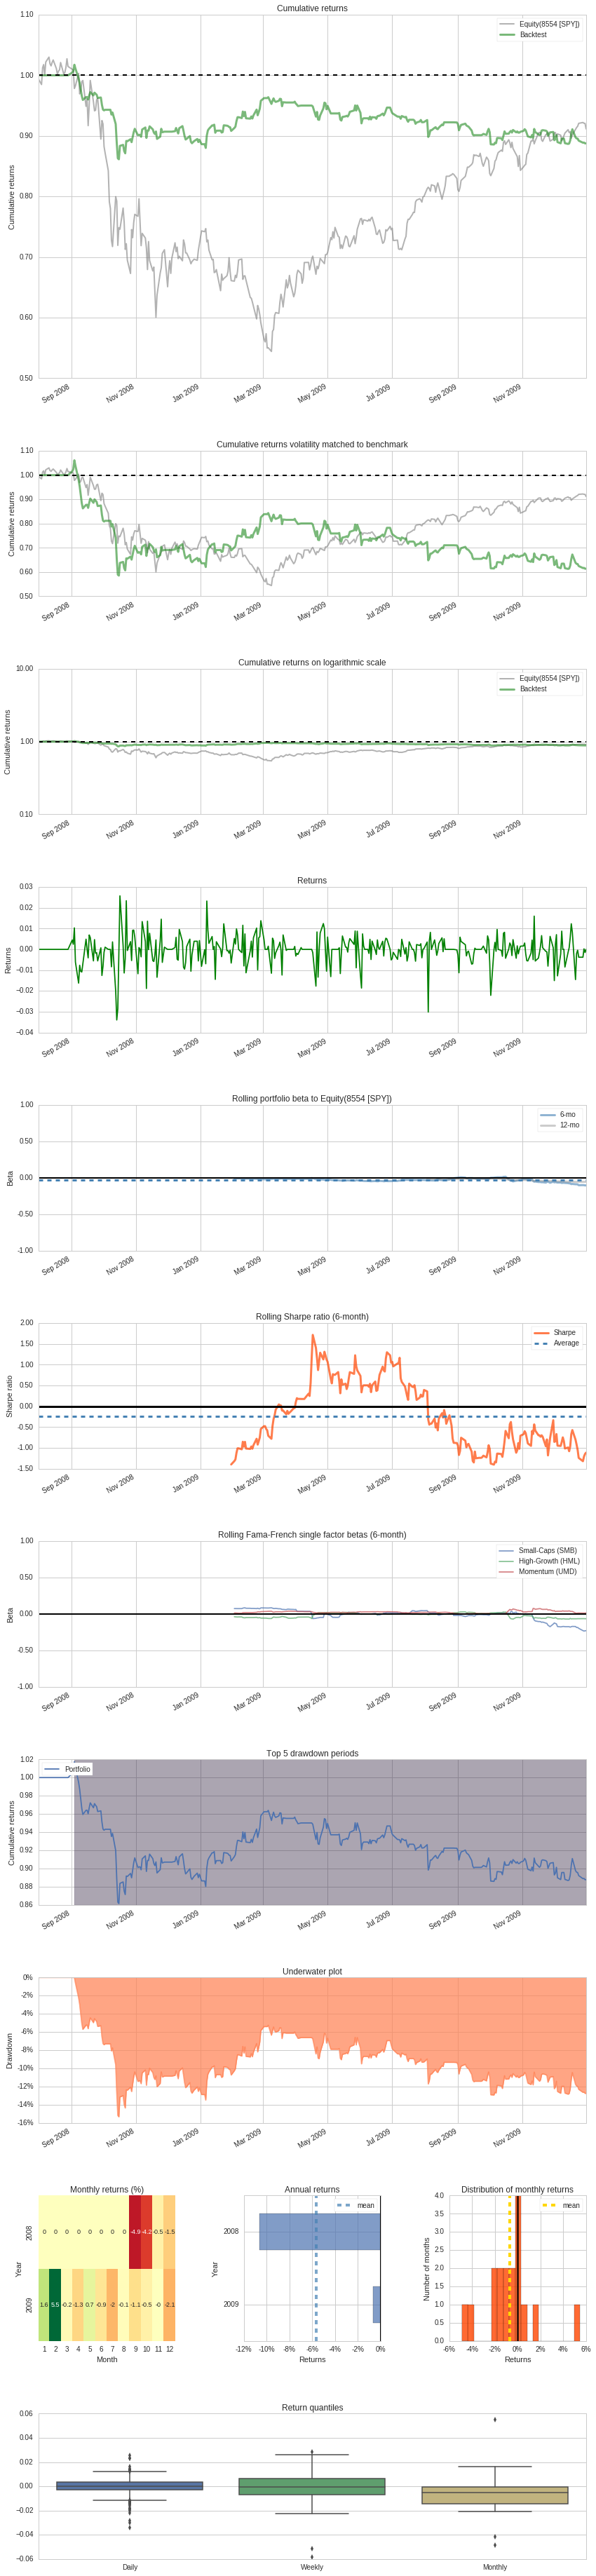

Stress Events,mean,min,max
Lehmann,-0.13%,-1.63%,1.03%
Sept08,-0.26%,-1.63%,1.03%
2009Q1,0.18%,-1.45%,2.33%
2009Q2,-0.03%,-1.77%,1.24%
GFC Crash,-0.03%,-3.40%,2.58%
Recovery,-0.04%,-3.02%,1.60%


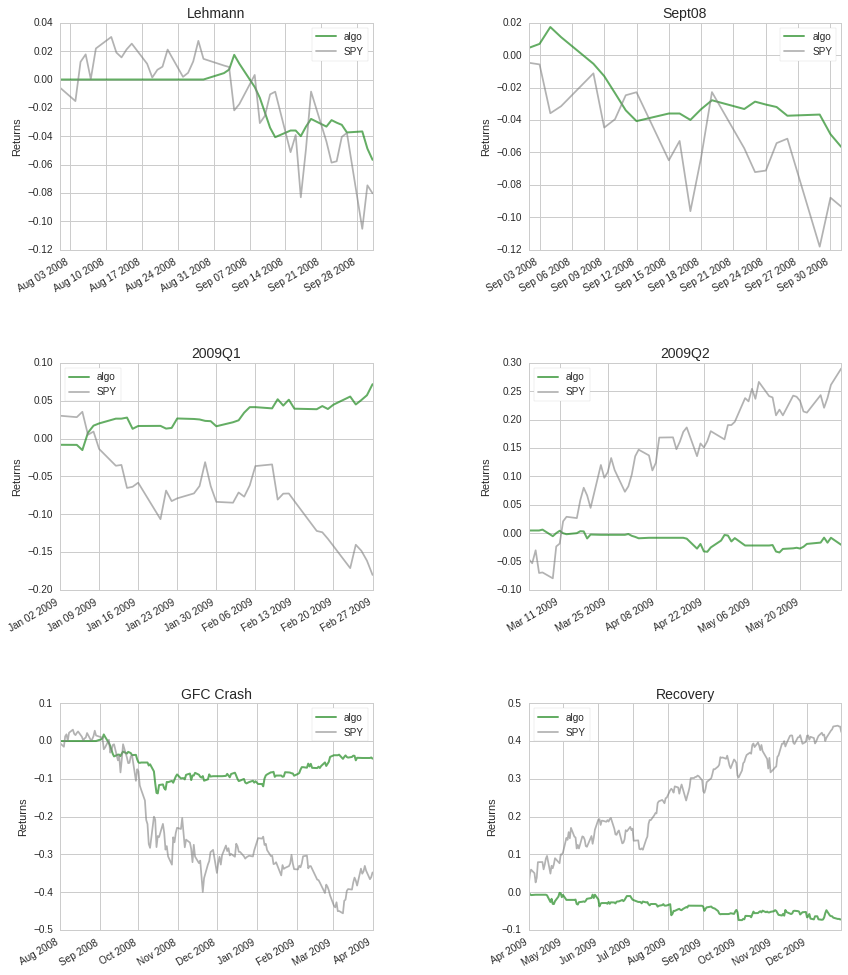

Top 10 long positions of all time,max
PEP-5885,61.61%
KO-4283,49.24%


Top 10 short positions of all time,max
PEP-5885,-100.17%
KO-4283,-61.40%


Top 10 positions of all time,max
PEP-5885,100.17%
KO-4283,61.40%


All positions ever held,max
PEP-5885,100.17%
KO-4283,61.40%


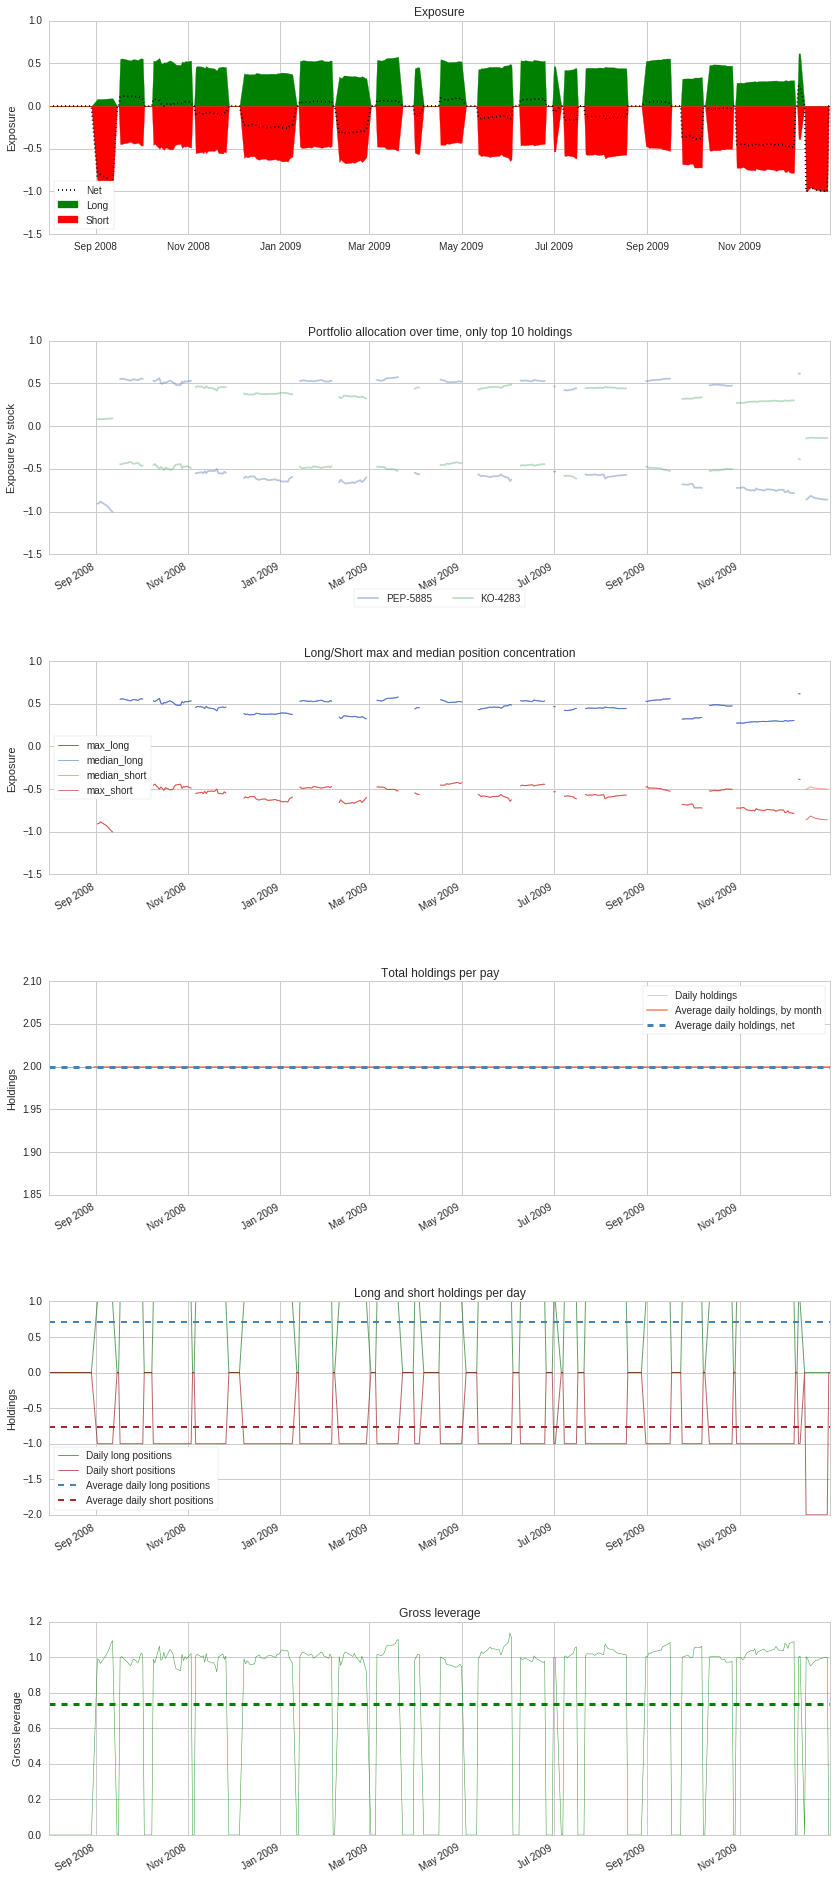

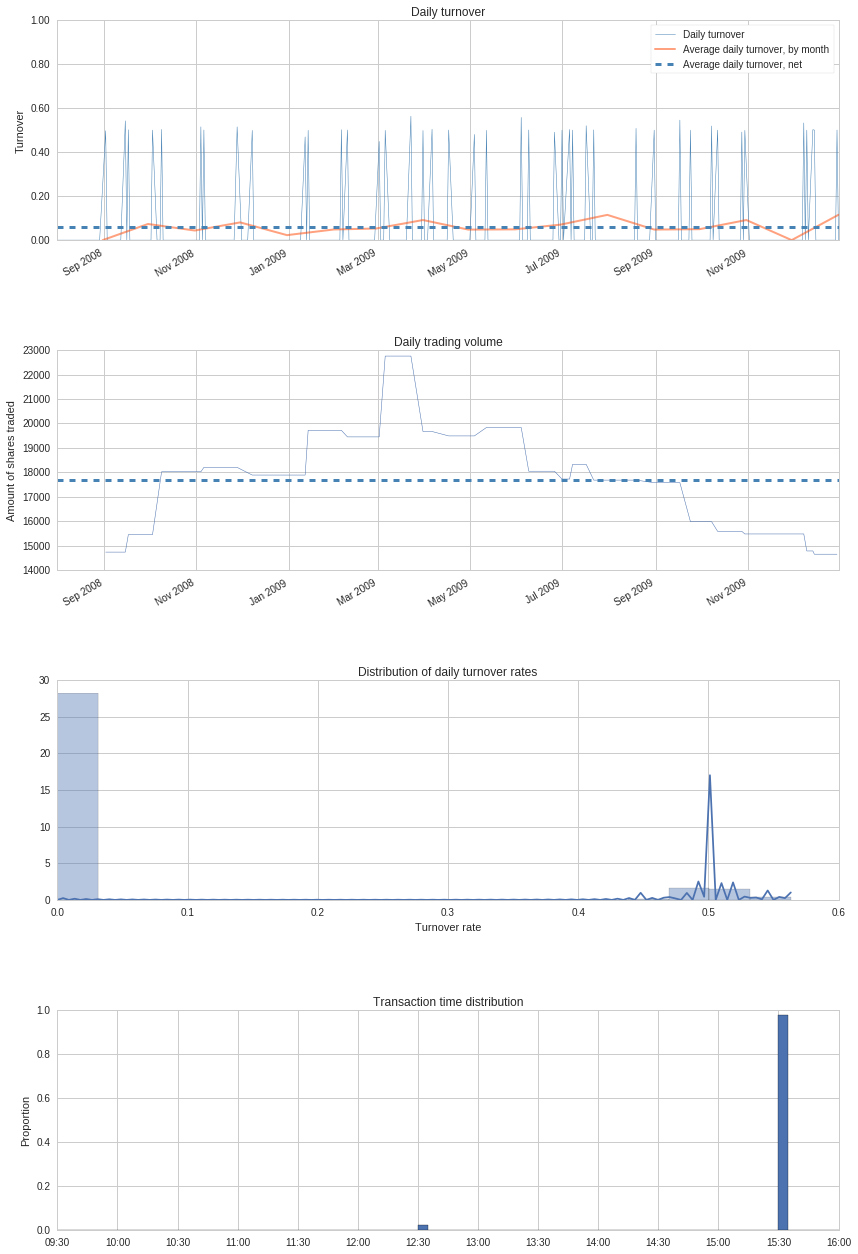

In [29]:
bt.create_full_tear_sheet()

***